Successfully loaded: D:\SEMESTER 6\AI LAB\Lab14\dataset.xlsx
Dataset shape: (1000, 9)
Dataset columns: ['Age', 'SiteSpending', 'SiteTime', 'RecommendImpression', 'Education', 'WorkType', 'Gender', 'Region', 'Salary']
First few rows:
   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

   Gender            Region    Salary  
0    Male            London  60173.49  
1  Female        South East  42965.45  
2    Male   East of England  54924.41  
3  Female  Northern Ireland  26734.99  
4    Male          Scotland  15325.23  

Preprocessing data:
Original data types

C:\Users\HP\AppData\Local\Temp\ipykernel_10956\3080217350.py:117: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)


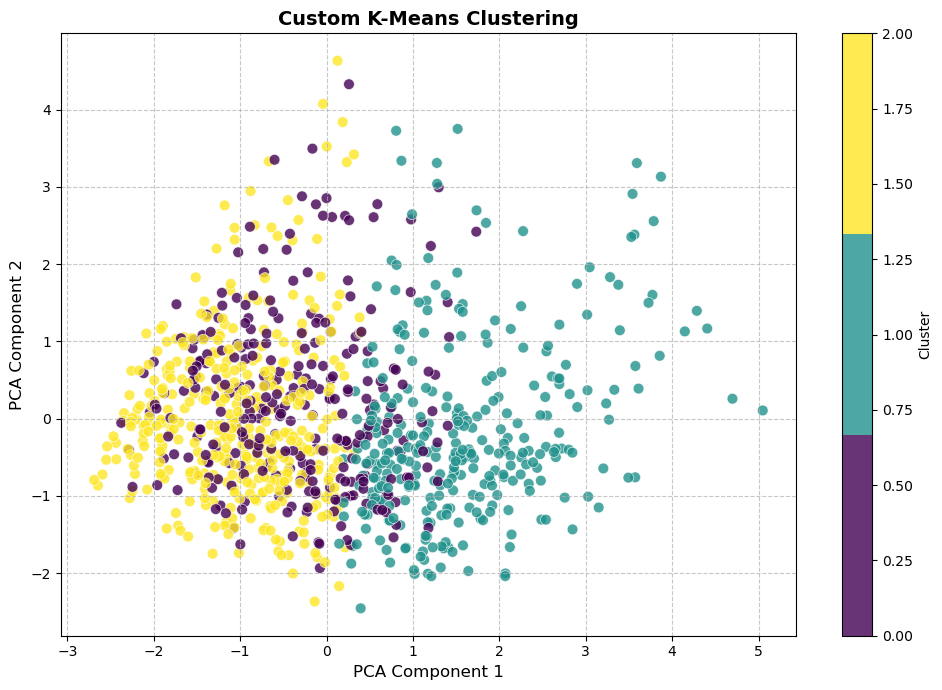

Visualization saved as Custom_K-Means_Clustering.png


C:\Users\HP\AppData\Local\Temp\ipykernel_10956\3080217350.py:117: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)


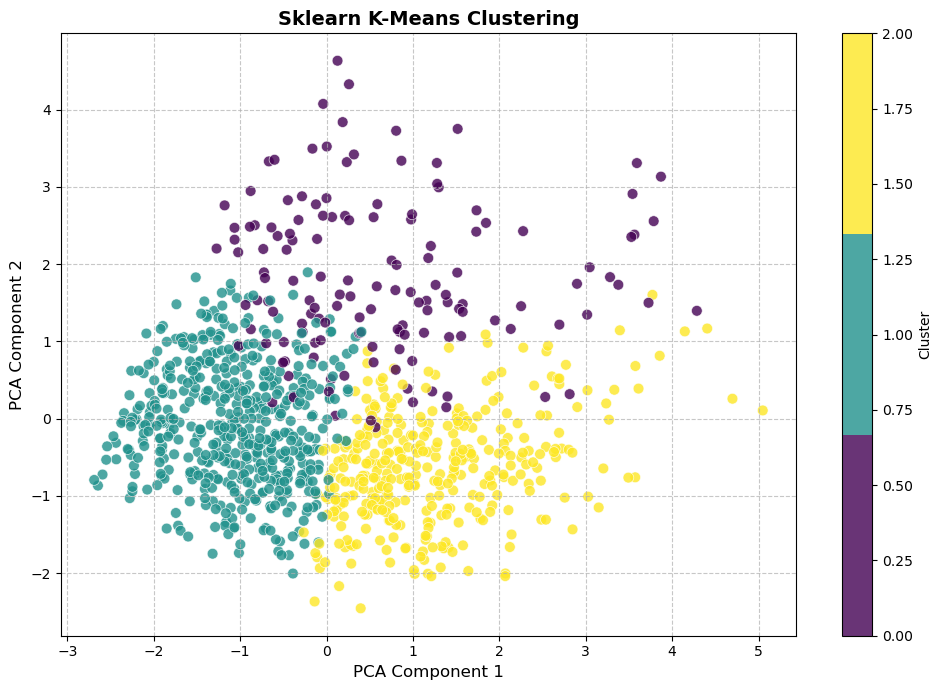

Visualization saved as Sklearn_K-Means_Clustering.png


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Load dataset
def load_dataset():
    df = pd.read_excel('dataset.xlsx')
    return 
    # Using an Excel file instead of CSV based on the file explorer screenshot
    file_path = r'D:\SEMESTER 6\AI LAB\Lab14\dataset.xlsx'
   
    try: 
        df = pd.read_excel(file_path)
        print(f"Successfully loaded: {file_path}")
        print(f"Dataset shape: {df.shape}")
        print(f"Dataset columns: {df.columns.tolist()}")
        print(f"First few rows:\n{df.head()}")
        return df
    except FileNotFoundError:
         print(f"ERROR: File not found at the specified path: '{file_path}'")
         print("Please verify the path and filename and update the script.")
         # Suggest alternative paths to try
         print("\nTrying alternative paths...")
         alternative_paths = [
             r'dataset.xlsx',  # Current directory
             r'.\dataset.xlsx',
             r'Lab14\dataset.xlsx',
             r'D:\SEMESTER 6\AI LAB\Lab14\dataset'  # Without extension
         ]
         
         for alt_path in alternative_paths:
             try:
                 print(f"Attempting to load from: {alt_path}")
                 df = pd.read_excel(alt_path)
                 print(f"Successfully loaded from alternative path: {alt_path}")
                 return df
             except Exception:
                 continue
                 
         raise FileNotFoundError("Could not find the dataset file in any attempted location")
    except Exception as e:
         print(f"An error occurred loading the file: {e}")
         raise

# Step 2: Preprocess dataset
def preprocess_data(df):
    df = df.copy()
    print("\nPreprocessing data:")
    print(f"Original data types:\n{df.dtypes}")
    
    # Handle missing values if any
    if df.isnull().sum().sum() > 0:
        print(f"Missing values found:\n{df.isnull().sum()}")
        
        for col in df.columns:
            if df[col].dtype == 'object':
                df[col] = df[col].fillna(df[col].mode()[0])
            else:
                df[col] = df[col].fillna(df[col].mean())
    
    # Encode categorical variables
    for col in df.select_dtypes(include=['object']).columns:
        print(f"Encoding categorical column: {col}")
        df[col] = LabelEncoder().fit_transform(df[col])
    
    # Normalize/scale numeric columns
    scaler = StandardScaler()
    df[df.columns] = scaler.fit_transform(df)
    print(f"Data after preprocessing:\n{df.head()}")
    return df

# Step 3: KMeans from scratch
def kmeans_from_scratch(X, k, max_iters=100):
    print("\nRunning custom K-means implementation...")
    n_samples, n_features = X.shape
    rng = np.random.default_rng(seed=42) 
    
    indices = rng.choice(n_samples, size=k, replace=False)
    centroids = X[indices]
    
    for i in range(max_iters):
        
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
       
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        
        if np.allclose(centroids, new_centroids):
            print(f"Converged after {i+1} iterations")
            break
            
        centroids = new_centroids
        
        if i == max_iters - 1:
            print(f"Maximum iterations ({max_iters}) reached without convergence")
            
    return labels, centroids


def visualize_clusters(X, labels, title):
    
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X)
    
    # Get unique clusters
    unique_clusters = np.unique(labels)
    n_clusters = len(unique_clusters)
    
    # Create plot
    plt.figure(figsize=(10, 7))
    
    # Use a colormap with distinct colors for each cluster
    cmap = plt.cm.get_cmap('viridis', n_clusters)
    
    scatter = plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=labels, cmap=cmap, 
                         alpha=0.8, s=60, edgecolors='w', linewidths=0.5)
    
    # Add cluster centers if available
    if 'centroids' in locals():
        centers_2d = pca.transform(centroids)
        plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='red', s=200, alpha=0.8, 
                   marker='X', edgecolors='black', linewidths=1.5, label='Centroids')
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel("PCA Component 1", fontsize=12)
    plt.ylabel("PCA Component 2", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.tight_layout()
    plt.savefig(f"{title.replace(' ', '_')}.png")
    plt.show()
    
    print(f"Visualization saved as {title.replace(' ', '_')}.png")

# Step 5: Evaluate the clustering
def evaluate_clustering(X, labels, method_name):
    from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
    
    try:
        silhouette = silhouette_score(X, labels)
        db_score = davies_bouldin_score(X, labels)
        ch_score = calinski_harabasz_score(X, labels)
        
        print(f"\nEvaluation metrics for {method_name}:")
        print(f"Silhouette Score: {silhouette:.4f} (higher is better, range: -1 to 1)")
        print(f"Davies-Bouldin Index: {db_score:.4f} (lower is better)")
        print(f"Calinski-Harabasz Index: {ch_score:.4f} (higher is better)")
        
        return {
            'silhouette': silhouette,
            'davies_bouldin': db_score,
            'calinski_harabasz': ch_score
        }
    except Exception as e:
        print(f"Error during evaluation: {e}")
        return {}

# Step 6: Main Execution
def main():
    # Parameters
    k = 3  # Number of clusters
    max_iter = 200  # Maximum iterations
    
    # Load and preprocess data
    df = load_dataset()
    df_processed = preprocess_data(df)
    
    # Make a copy of the original data with cluster assignments
    df_results = df.copy()
    
    # KMeans from scratch
    print(f"\nRunning KMeans with k={k}, max_iterations={max_iter}")
    labels_custom, centroids_custom = kmeans_from_scratch(df_processed.values, k, max_iter)
    df_results['Cluster_Custom'] = labels_custom
    
    # Evaluate custom implementation
    custom_metrics = evaluate_clustering(df_processed.values, labels_custom, "Custom KMeans")
    
    # KMeans from sklearn for comparison
    print("\nRunning sklearn's KMeans implementation for comparison...")
    kmeans = KMeans(n_clusters=k, max_iter=max_iter, random_state=42, n_init=10)
    labels_sklearn = kmeans.fit_predict(df_processed)
    df_results['Cluster_Sklearn'] = labels_sklearn
    
    # Evaluate sklearn implementation
    sklearn_metrics = evaluate_clustering(df_processed.values, labels_sklearn, "Sklearn KMeans")
    
    # Compare results
    print("\nCluster distribution:")
    print("Custom implementation:", np.bincount(labels_custom))
    print("Sklearn implementation:", np.bincount(labels_sklearn))
    
    # Check agreement between implementations
    agreement = np.mean(labels_custom == labels_sklearn)
    print(f"\nAgreement between implementations: {agreement:.2%}")
    
    # Save results
    df_results.to_csv('clustering_results.csv', index=False)
    print("\nResults saved to 'clustering_results.csv'")
    
    # Visualizations
    visualize_clusters(df_processed.values, labels_custom, "Custom K-Means Clustering")
    visualize_clusters(df_processed.values, labels_sklearn, "Sklearn K-Means Clustering")
    
    return df_results, custom_metrics, sklearn_metrics

if __name__ == "__main__":
    main()